In [1]:
import numpy as np
import pandas as pd
import keras
from keras import models
from keras import layers
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [2]:
def create_data(path, techpar):
    df = pd.read_csv(path , sep = '\t')
    if techpar == '':
        df_new = pd.DataFrame()
        Permx = df["PERMX"].tolist()
        Permy = df["PERMY"].tolist()
        Permz = df["PERMZ"].tolist()
        Dates = df["Dates"].tolist()
        df_new.insert(0, "PERMX", Permx, True)
        df_new.insert(1, "PERMY", Permy, True)
        df_new.insert(2, "PERMZ", Permz, True)
        df_new.insert(3, "Dates", Dates, True)
        data = df_new.to_numpy()  
        return data
    else:
        Par = df[techpar].tolist()
        targets = np.array(Par)
        return targets

def data_preparation(train, test):
    mean = train.mean(axis=0)
    train -= mean
    std = train.std(axis=0)
    train /= std
    
    test -= mean
    test /= std

    return test, train

def create_model():
    model = keras.Sequential()
    model.add(layers.Dense(16, activation = 'relu',
                        input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(16, activation = 'relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])

    """
    model = keras.Sequential([
        Flatten(input_shape = (train_data.shape[1],)),
        Dense(16, activation = 'relu'),
        Dense(16, activation = 'relu')
    ])
    """
    return model

In [3]:
path_train = r'train_with_date.txt'
path_test = r'test_with_date.txt'              
train_data = create_data(path_train, '')
test_data = create_data(path_test, '')
parameter = 'Qcum_oil(m3)'
train_targets = create_data(path_train, parameter )
test_targets = create_data(path_test, parameter )

train_data = data_preparation(train_data, test_data)[1]
test_data = data_preparation(train_data, test_data)[0]

In [4]:
k = 4
num_val_samples = len(train_data)// k
all_scores = []
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('--Processing--')
    val_data = train_data[i * num_val_samples:(i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples:(i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    patrial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = create_model()
    history = model.fit(partial_train_data, patrial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs = num_epochs, batch_size = 1, verbose = 0)

    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)
print('Complete')

--Processing--
--Processing--
--Processing--
--Processing--
Complete


In [5]:
avarage_mae_history = [np.mean(
    [x[i] for x in all_mae_histories]) for i in range(num_epochs)]

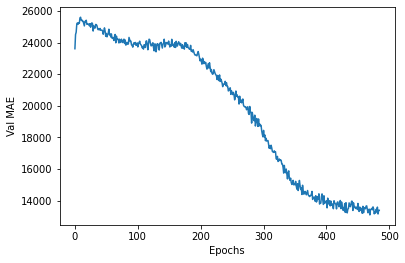

In [6]:
plt.plot(range(0, len(avarage_mae_history)-15), avarage_mae_history[15:])
plt.xlabel('Epochs')
plt.ylabel('Val MAE')
plt.show()

In [11]:
if parameter == 'Qoil(m3\day)' or 'Qoil(t\day)' or 'Qliq(m3\day)':
    num_epochs = 250
else: num_epochs = 100
    

#model = create_model()
#model.fit(train_data, train_targets,
 #         epochs = num_epochs, batch_size = 1, verbose = 0,
  #        validation_split = 0.2)

In [12]:
k = 4
num_val_samples = len(train_data)// k
all_scores = []
for i in range(k):
    print('--Processing--', i+1)
    val_data = train_data[i * num_val_samples:(i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples:(i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    patrial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = create_model()
    model.fit(partial_train_data, patrial_train_targets,
              epochs = num_epochs, batch_size = 1, verbose = 0)

    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
print('Complete')

--Processing-- 1
--Processing-- 2
--Processing-- 3
--Processing-- 4
Complete


In [13]:
print(all_scores)

[26412.201171875, 17048.310546875, 20138.779296875, 34942.265625]


In [14]:
mae = model.evaluate(test_data, test_targets, verbose=0)[1]
mae

15860.740234375

In [15]:
y1 = model.predict(test_data)

In [16]:
y2 = np.array(test_targets).tolist()

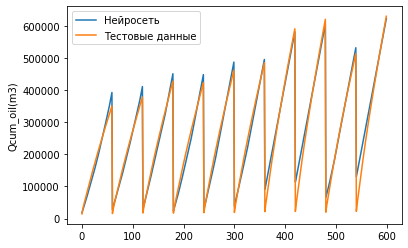

In [17]:
plt.plot(range(0, len(y1)), y1, label = 'Нейросеть')
plt.plot(range(0, len(y2)), y2, label = 'Тестовые данные')
plt.ylabel(parameter)
plt.legend()
plt.show()

In [33]:
n = 1
x = np.expand_dims(test_data[n], axis = 0)
res = model.predict(x)
print(res)

[[22756.293]]


In [34]:
print(test_targets[n])

23535.40577


In [35]:
print(test_data[n])

[-1.32713845 -0.92740776 -0.8520375  -1.64692055]
